# 🏠 Loan Approval Prediction Project

![Python](https://img.shields.io/badge/Python-3.8%2B-blue)
![Scikit-Learn](https://img.shields.io/badge/Library-Scikit--Learn-orange)
![MLflow](https://img.shields.io/badge/Tracking-MLflow-blueviolet)
![Status](https://img.shields.io/badge/Status-Completed-success)

## 📌 Project Overview
This machine learning project aims to automate the loan eligibility process for financial institutions. By analyzing customer details provided in online application forms, the model predicts whether a loan should be **Approved (`Y`)** or **Rejected (`N`)**. 

The solution helps streamline decision-making, reduce manual effort, and manage risk effectively by identifying eligible applicants based on their financial and demographic profiles.



In [192]:
import numpy as np 
import pandas as pd

In [193]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### first 5 min

In [194]:
df.shape

(614, 13)

In [195]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [197]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002990,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [198]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [199]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Data Preprocessing
* **Missing Values:** Imputed categorical variables with **Mode** and numerical variables with **Median**.
* **Encoding:** Applied **One-Hot Encoding** for categorical features and **Label Encoding** for the target.
* **Balancing:** Utilized **SMOTE** (Synthetic Minority Over-sampling Technique) to address class imbalance.
* **Scaling:** Normalized features using `StandardScaler`.
* **Total Income:** Created a new feature combining `ApplicantIncome` and `CoapplicantIncome`.
* **Log Transformation:** Applied to `LoanAmount` and `TotalIncome` to normalize distributions.
* etc ...

# EDA and Data Preprocessing
---

In [200]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Dealing with missing data 

In [201]:
#detect nulls 
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [202]:
# Loan_ID is just an identifier → drop it before training.
df = df.drop('Loan_ID', axis=1)

In [203]:
# Numerical Imputation
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [204]:
# Categorical Imputation (Mode)
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [205]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Detect Duplicates

In [206]:
# detect duplicates
df.duplicated().sum()

np.int64(0)

In [207]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [208]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [209]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [210]:
#convert '3+' to 3 and change datatype to float
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)

In [211]:
df['Dependents'].unique()

array([0., 1., 2., 3.])

In [212]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [213]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [214]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

## Feature Engineering

In [215]:
# ApplicantIncome + CoapplicantIncome can be combined into a TotalIncome feature.
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [216]:
#  Log Transformation (To handle Skewness)
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['TotalIncome_log'] = np.log(df['TotalIncome'])

In [217]:
# create Loan_Term_Years feature
df['Loan_Amount_Term_Years'] = df['Loan_Amount_Term'] / 12
def classify_term(years):
    if years < 15:
        return 'Short_Term'
    elif years < 30:
        return 'Medium_Term'
    else:
        return 'Long_Term'

In [218]:
df['Loan_Term'] = df['Loan_Amount_Term_Years'].apply(classify_term)

In [219]:
# dropping original columns
df = df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'TotalIncome', 'Loan_Amount_Term', 'Loan_Amount_Term_Years'], axis=1)

In [220]:
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log,Loan_Term
0,Male,No,0.0,Graduate,No,1.0,Urban,Y,4.852030,8.674026,Long_Term
1,Male,Yes,1.0,Graduate,No,1.0,Rural,N,4.852030,8.714568,Long_Term
2,Male,Yes,0.0,Graduate,Yes,1.0,Urban,Y,4.189655,8.006368,Long_Term
3,Male,Yes,0.0,Not Graduate,No,1.0,Urban,Y,4.787492,8.505323,Long_Term
4,Male,No,0.0,Graduate,No,1.0,Urban,Y,4.948760,8.699515,Long_Term
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,1.0,Rural,Y,4.262680,7.972466,Long_Term
610,Male,Yes,3.0,Graduate,No,1.0,Rural,Y,3.688879,8.320205,Medium_Term
611,Male,Yes,1.0,Graduate,No,1.0,Urban,Y,5.533389,9.025456,Long_Term
612,Male,Yes,2.0,Graduate,No,1.0,Urban,Y,5.231109,8.933664,Long_Term


## Encoding

In [221]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# B. One-Hot Encode Categorical Features
# We use drop_first=True to avoid multicollinearity
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 
            'Self_Employed', 'Property_Area','Loan_Term']

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [222]:
df

,Credit_History,Loan_Status,LoanAmount_log,TotalIncome_log,Gender_Male,Married_Yes,Dependents_1.0,Dependents_2.0,Dependents_3.0,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Term_Medium_Term,Loan_Term_Short_Term
0,1.0,1,4.852030,8.674026,True,False,False,False,False,False,False,False,True,False,False
1,1.0,0,4.852030,8.714568,True,True,True,False,False,False,False,False,False,False,False
2,1.0,1,4.189655,8.006368,True,True,False,False,False,False,True,False,True,False,False
3,1.0,1,4.787492,8.505323,True,True,False,False,False,True,False,False,True,False,False
4,1.0,1,4.948760,8.699515,True,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,1,4.262680,7.972466,False,False,False,False,False,False,False,False,False,False,False
610,1.0,1,3.688879,8.320205,True,True,False,False,True,False,False,False,False,True,False
611,1.0,1,5.533389,9.025456,True,True,True,False,False,False,False,False,True,False,False
612,1.0,1,5.231109,8.933664,True,True,False,True,False,False,False,False,True,False,False


## Detect and Handle Outliers

In [223]:
df.columns

Index(['Credit_History', 'Loan_Status', 'LoanAmount_log', 'TotalIncome_log',
       'Gender_Male', 'Married_Yes', 'Dependents_1.0', 'Dependents_2.0',
       'Dependents_3.0', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Term_Medium_Term', 'Loan_Term_Short_Term'],
      dtype='object')

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [225]:
# # detect outliers manually
# q1 = df['Loan_Amount_Term_Years'].quantile(0.25)
# q3 = df['Loan_Amount_Term_Years'].quantile(0.75)
# IQR = q3 - q1
# IQR

# wisk_min = q1 - 1.5 * IQR
# wisk_max = q3 + 1.5 * IQR

# df[(df['Loan_Amount_Term_Years'] < wisk_min) | (df['Loan_Amount_Term_Years'] > wisk_max)]
# sns.boxenplot(x=df['Loan_Amount_Term_Years'], color='lightblue')
# plt.show()

## Splitting (Train-Test Split)

In [226]:
# Features
X = df.drop(columns=['Loan_Status'])
# Target
y = df['Loan_Status']


In [227]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (429, 14)
X_test shape: (185, 14)


In [228]:
# Handle class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
# Apply SMOTE to training data ONLY
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print(f"Original Training Shape: {X_train.shape}")
print(f"Resampled Training Shape: {X_train.shape}")

Original Training Shape: (590, 14)
Resampled Training Shape: (590, 14)


## Feature Scaling

In [229]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Scaled training data head:")
display(pd.DataFrame(X_train).head())

Scaled training data head:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.499926,-0.177479,-0.589567,-2.213594,-1.360236,-0.494698,-0.415887,-0.317406,1.809796,-0.435335,-0.737904,1.370419,-0.387424,-0.144088
1,0.499926,-0.246161,-0.139239,0.451754,0.735167,-0.494698,-0.415887,-0.317406,-0.552548,-0.435335,-0.737904,-0.729704,-0.387424,-0.144088
2,0.499926,-0.353758,-0.816394,0.451754,0.735167,-0.494698,-0.415887,-0.317406,-0.552548,-0.435335,1.355189,-0.729704,-0.387424,-0.144088
3,0.499926,-0.094777,-0.063903,0.451754,0.735167,-0.494698,-0.415887,-0.317406,-0.552548,-0.435335,1.355189,-0.729704,-0.387424,-0.144088
4,0.499926,-0.629551,-0.912127,0.451754,-1.360236,-0.494698,-0.415887,-0.317406,-0.552548,-0.435335,-0.737904,1.370419,-0.387424,-0.144088


# Model Training & Tracking
I implemented a systematic training pipeline where **each algorithm was evaluated in two stages**:
1.  **Baseline Model:** Trained using default parameters (without `GridSearchCV`) to establish a benchmark.
2.  **Tuned Model:** Optimized using `GridSearchCV` to find the best hyperparameters via Cross-Validation.

The following models were implemented and tracked using **MLflow**:

* **Logistic Regression**
    * *Baseline:* Default settings.
    * *GridSearch:* Tuned L1 (Lasso) and L2 (Ridge) regularization strength (`C`).
* **Decision Tree Classifier**
    * *Baseline:* Default growth.
    * *GridSearch:* Tuned `max_depth` and split criteria (Gini vs. Entropy).
* **Random Forest Classifier**
    * *Baseline:* Default ensemble settings.
    * *GridSearch:* Tuned number of trees (`n_estimators`) and tree depth (`max_depth`).
* **AdaBoost Classifier**
    * *Baseline:* Default boosting.
    * *GridSearch:* Tuned learning rate and number of estimators.

# Different Models Training 
---

## MLFlow


In [230]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def run_mlflow(model, run_name, X_train, X_test, y_train, y_test, experiment_name="Loan_Prediction_Models"):
    """
    Trains a model and logs it to MLflow.
    Function renamed to 'run_mlflow' to avoid conflict with the library name.
    """
    
    # Set the experiment
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run(run_name=run_name):
        # 1. Train
        model.fit(X_train, y_train)
        
        # 2. Predict
        y_pred = model.predict(X_test)
        
        # 3. Calculate Metrics
        metrics = {
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred),
            "f1_score": f1_score(y_test, y_pred)
        }
        
        # 4. Log to MLflow
        mlflow.log_params(model.get_params())
        mlflow.log_metrics(metrics)
        mlflow.sklearn.log_model(model, "model")
        
        # 5. Output for console verification
        print(f"--- Run: {run_name} ---")
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print(f"Recall: {metrics['recall']:.4f}")
        print(f"MLflow Run ID: {mlflow.active_run().info.run_id}\n")

## First : without GridSearchCV
---

### A.Logistic Regression  

In [231]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [232]:
# Initialize and train logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
# Make predictions
y_pred = logreg.predict(X_test)
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.81
Confusion Matrix:
[[ 40  18]
 [ 18 109]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        58
           1       0.86      0.86      0.86       127

    accuracy                           0.81       185
   macro avg       0.77      0.77      0.77       185
weighted avg       0.81      0.81      0.81       185



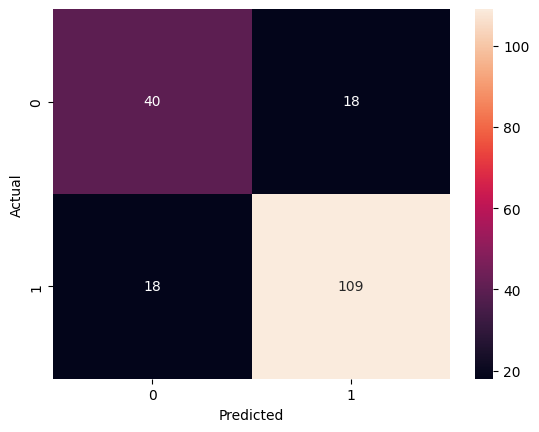

In [233]:
# Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

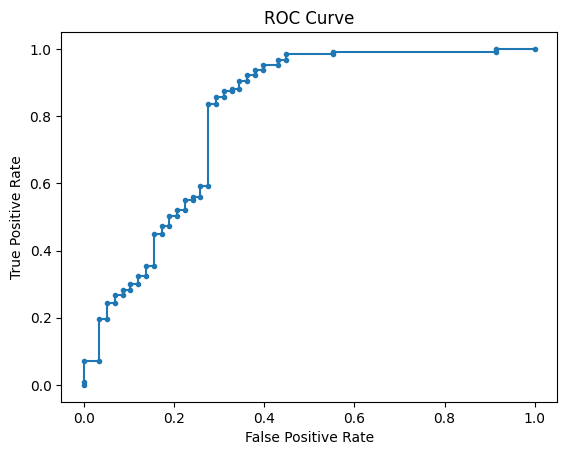

AUC Score: 0.8031496062992126


In [234]:
# ROC Curve
y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score}")

In [235]:
# mlflow 
run_mlflow(logreg, "Logistic_Regression", X_train, X_test, y_train, y_test)

2025/12/16 04:55:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/16 04:55:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


--- Run: Logistic_Regression ---
Accuracy: 0.8054
Recall: 0.8583
MLflow Run ID: 0d386e521bce48c5853c5507f399cd80



---

#### Train Logistic Regression with different penalties: L1, L2

In [236]:
# L2 Regularization Ridge
logreg_l2_tuned = LogisticRegression( 
    penalty='l2' , 
    C=0.5 , 
    max_iter=1000 , 
    random_state=42 
)
# Fit the model
logreg_l2_tuned.fit(X_train, y_train)
# Make predictions
y_pred_l2_tuned = logreg_l2_tuned.predict(X_test)
# performance report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_l2_tuned))
print("--- Logistic Regression with L2 Regularization  ---")
print(classification_report(y_test, y_pred_l2_tuned))

Confusion Matrix:
[[ 40  18]
 [ 18 109]]
--- Logistic Regression with L2 Regularization  ---
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        58
           1       0.86      0.86      0.86       127

    accuracy                           0.81       185
   macro avg       0.77      0.77      0.77       185
weighted avg       0.81      0.81      0.81       185



In [237]:
#mlflow
run_mlflow(logreg_l2_tuned, "Logistic_Regression_L2_Tuned", X_train, X_test, y_train, y_test)

2025/12/16 04:55:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/16 04:55:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


--- Run: Logistic_Regression_L2_Tuned ---
Accuracy: 0.8054
Recall: 0.8583
MLflow Run ID: 3003e72e2e5b47d8b3f064f2c2f0b6bc



In [238]:
# L1 regularization (Lasso) 
logreg_l1 = LogisticRegression(
    penalty='l1',      
    C=0.5,               
    solver='liblinear', 
    max_iter=1000,       
    random_state=42      
)

logreg_l1.fit(X_train, y_train)
# Make predictions
y_pred_l1 = logreg_l1.predict(X_test)
# performance report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_l1))
print("\nClassification Report :")
print(classification_report(y_test, y_pred_l1))

Confusion Matrix:
[[ 39  19]
 [ 17 110]]

Classification Report :
              precision    recall  f1-score   support

           0       0.70      0.67      0.68        58
           1       0.85      0.87      0.86       127

    accuracy                           0.81       185
   macro avg       0.77      0.77      0.77       185
weighted avg       0.80      0.81      0.80       185



In [239]:
#mlflow
run_mlflow(logreg_l2_tuned, "Logistic_Regression_L1_Tuned", X_train, X_test, y_train, y_test)

2025/12/16 04:55:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/16 04:55:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


--- Run: Logistic_Regression_L1_Tuned ---
Accuracy: 0.8054
Recall: 0.8583
MLflow Run ID: 394c77a139d34e34b146b4aa6647bf1c



### B.Decision Tree

In [240]:
from sklearn.tree import DecisionTreeClassifier
# Train Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
# Make predictions
y_pred_tree = tree_clf.predict(X_test)
# performance report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report :")
print(classification_report(y_test, y_pred_tree))

Confusion Matrix:
[[40 18]
 [37 90]]

Classification Report :
              precision    recall  f1-score   support

           0       0.52      0.69      0.59        58
           1       0.83      0.71      0.77       127

    accuracy                           0.70       185
   macro avg       0.68      0.70      0.68       185
weighted avg       0.73      0.70      0.71       185



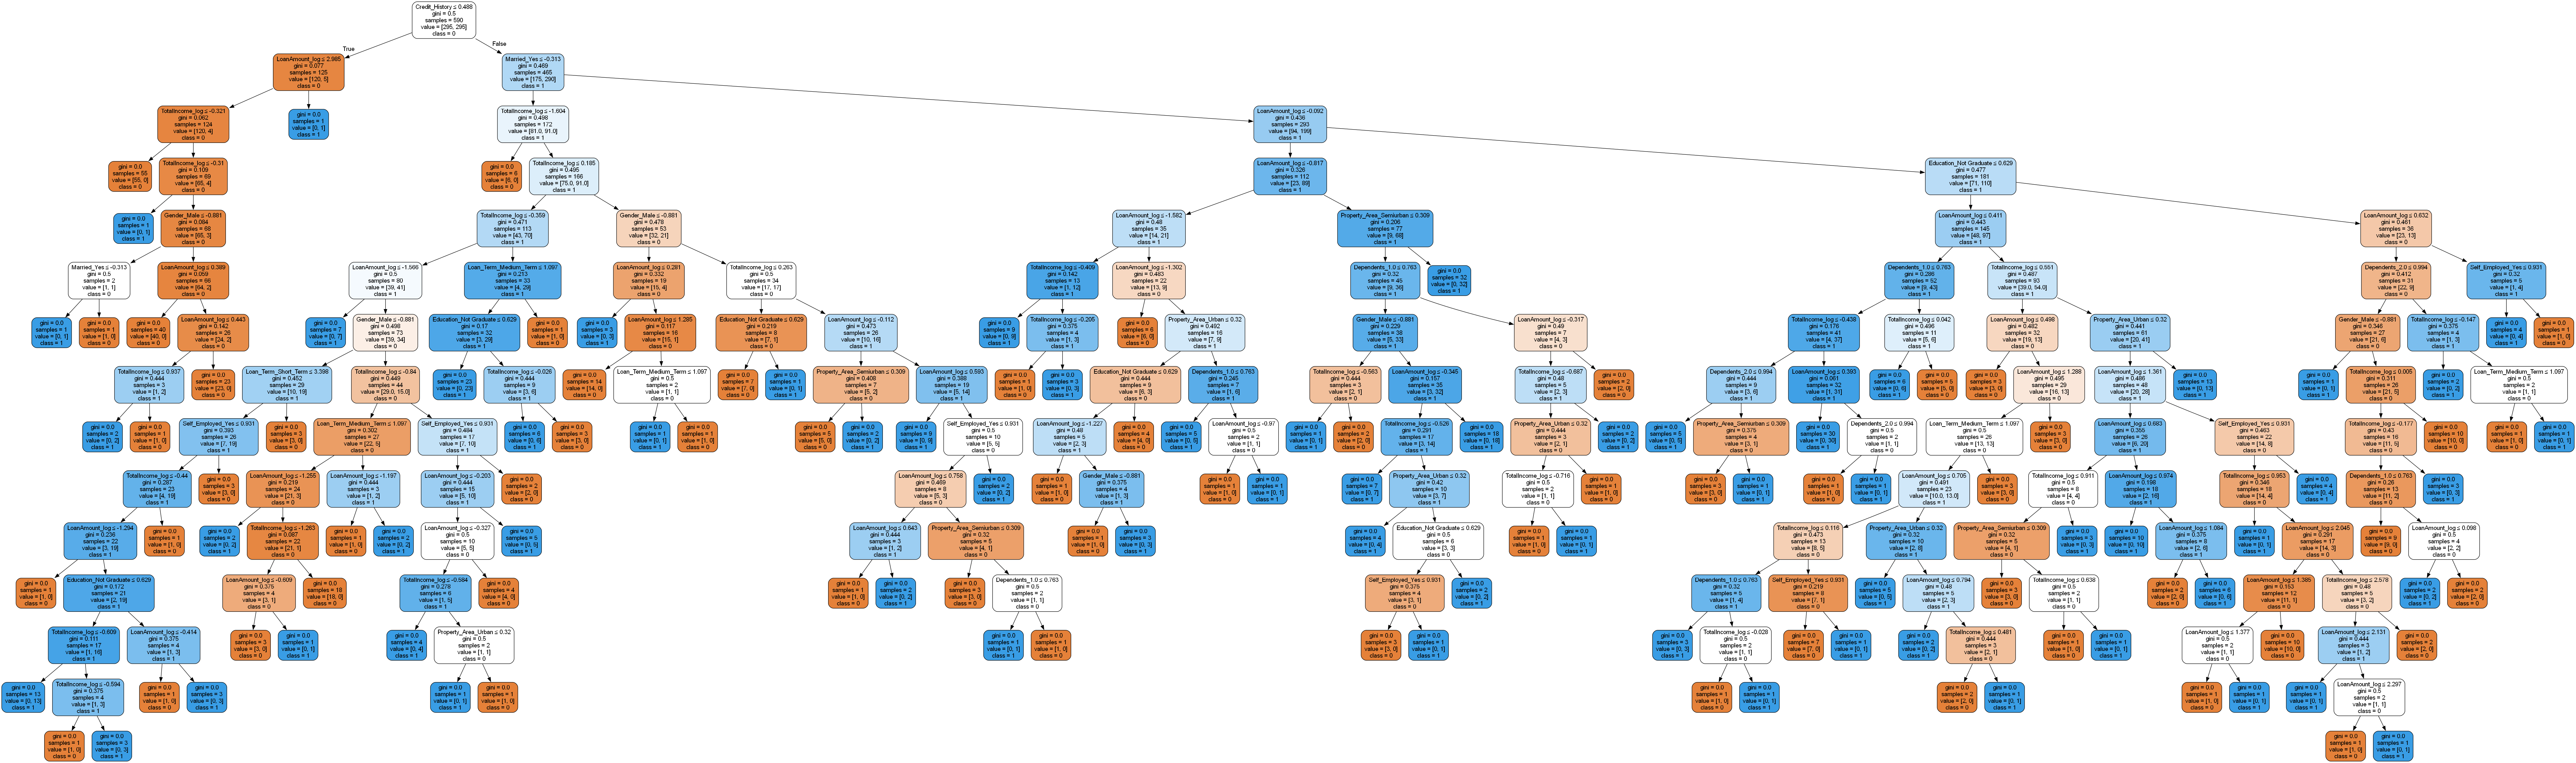

In [241]:
# Visualizing the Decision Tree
import pydot
from sklearn.tree import export_graphviz
from IPython.display import Image
from io import StringIO
model_to_plot = tree_clf 
features = X.columns
dot_data = StringIO()
export_graphviz(
    model_to_plot,
    out_file=dot_data,
    feature_names=features,
    class_names=[str(c) for c in model_to_plot.classes_], 
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [242]:
# tuned Decision Tree Classifier
dt_tuned = DecisionTreeClassifier(
    criterion='entropy',       
    max_depth=1,            
    min_samples_split=2,  
    min_samples_leaf=2,     
    random_state=42
)
dt_tuned.fit(X_train, y_train)
y_pred_tree = dt_tuned.predict(X_test)
# performance report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report :")
print(classification_report(y_test, y_pred_tree))

Confusion Matrix:
[[ 32  26]
 [  2 125]]

Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.55      0.70        58
           1       0.83      0.98      0.90       127

    accuracy                           0.85       185
   macro avg       0.88      0.77      0.80       185
weighted avg       0.86      0.85      0.84       185



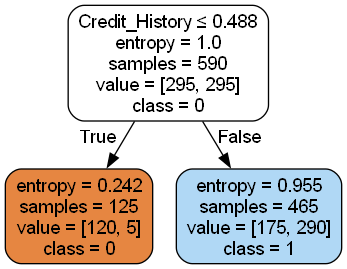

In [243]:
# Visualizing the Decision Tree
import pydot
from sklearn.tree import export_graphviz
from IPython.display import Image
from io import StringIO
model_to_plot = dt_tuned  
features = X.columns
dot_data = StringIO()
export_graphviz(
    model_to_plot,
    out_file=dot_data,
    feature_names=features,
    class_names=[str(c) for c in model_to_plot.classes_], 
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [244]:

dt_tuned = DecisionTreeClassifier(
    criterion='gini',       
    max_depth=2,           
    min_samples_split=10,   
    min_samples_leaf=5,     
    random_state=42
)
dt_tuned.fit(X_train, y_train)
y_pred_tree = dt_tuned.predict(X_test)
# performance report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report :")
print(classification_report(y_test, y_pred_tree))

Confusion Matrix:
[[ 32  26]
 [  2 125]]

Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.55      0.70        58
           1       0.83      0.98      0.90       127

    accuracy                           0.85       185
   macro avg       0.88      0.77      0.80       185
weighted avg       0.86      0.85      0.84       185



In [245]:
#mlflow
run_mlflow(dt_tuned, "Decision_Tree", X_train, X_test, y_train, y_test)

2025/12/16 04:55:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/16 04:55:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


--- Run: Decision_Tree ---
Accuracy: 0.8486
Recall: 0.9843
MLflow Run ID: e5eecd56f0cc446699460d406d19ba43



### C.Random Forest

In [246]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
# Make predictions
y_pred_rf = rf_clf.predict(X_test)
# performance report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report :")
print(classification_report(y_test, y_pred_rf))

Confusion Matrix:
[[ 37  21]
 [ 22 105]]

Classification Report :
              precision    recall  f1-score   support

           0       0.63      0.64      0.63        58
           1       0.83      0.83      0.83       127

    accuracy                           0.77       185
   macro avg       0.73      0.73      0.73       185
weighted avg       0.77      0.77      0.77       185



In [247]:
# Tuned Random Forest Classifier
rf_model = RandomForestClassifier(
    criterion='gini',
    n_estimators=100, 
    random_state=42 , 
    max_depth=1, 
    min_samples_split=5, 
    min_samples_leaf=2 , 
    )
rf_model.fit(X_train, y_train)
# Make predictions
y_pred = rf_model.predict(X_test)
# performance report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report :")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 34  24]
 [  8 119]]

Classification Report :
              precision    recall  f1-score   support

           0       0.81      0.59      0.68        58
           1       0.83      0.94      0.88       127

    accuracy                           0.83       185
   macro avg       0.82      0.76      0.78       185
weighted avg       0.83      0.83      0.82       185



In [248]:
#mlflow
run_mlflow(rf_model, "Random_Forest", X_train, X_test, y_train, y_test)

2025/12/16 04:55:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/16 04:55:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


--- Run: Random_Forest ---
Accuracy: 0.8270
Recall: 0.9370
MLflow Run ID: 44159cd109374af9bcac72b331abde29



### D.Ada Boosting 

In [249]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(
    n_estimators=100, 
    learning_rate=0.01, 
    random_state=42
    )
ada_model.fit(X_train, y_train)
# Make predictions
y_pred = ada_model.predict(X_test)
# performance report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report :")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 32  26]
 [  2 125]]

Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.55      0.70        58
           1       0.83      0.98      0.90       127

    accuracy                           0.85       185
   macro avg       0.88      0.77      0.80       185
weighted avg       0.86      0.85      0.84       185



In [250]:
#mlflow
run_mlflow(ada_model, "AdaBoost", X_train, X_test, y_train, y_test)

2025/12/16 04:55:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/16 04:55:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


--- Run: AdaBoost ---
Accuracy: 0.8486
Recall: 0.9843
MLflow Run ID: e30fcd7ebdbb44039eddb63b60b8159d



### E . Support Vector Machine (SVM)

In [251]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC(random_state=42)
svc.fit(X_train,y_train)
# Make predictions
y_pred=svc.predict(X_test)
# performance report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report :")  
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 34  24]
 [ 18 109]]

Classification Report :
              precision    recall  f1-score   support

           0       0.65      0.59      0.62        58
           1       0.82      0.86      0.84       127

    accuracy                           0.77       185
   macro avg       0.74      0.72      0.73       185
weighted avg       0.77      0.77      0.77       185



In [252]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC(random_state=42, C=0.1, kernel='linear', gamma='scale')
svc.fit(X_train,y_train)
# Make predictions
y_pred=svc.predict(X_test)
# performance report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report :")  
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 32  26]
 [  2 125]]

Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.55      0.70        58
           1       0.83      0.98      0.90       127

    accuracy                           0.85       185
   macro avg       0.88      0.77      0.80       185
weighted avg       0.86      0.85      0.84       185



In [253]:
# mlflow
run_mlflow(svc, "SVM", X_train, X_test, y_train, y_test)

2025/12/16 04:55:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/16 04:55:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


--- Run: SVM ---
Accuracy: 0.8486
Recall: 0.9843
MLflow Run ID: 5496b52c7fba44bbb332002634029893



## Second : with GridSearchCV
---

### A.Logistic Regrission

#### Train Logistic Regression with different penalties: L1, L2

In [254]:
# with L2 penalty with GridsearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
# Define the base logistic regression model
logreg_base = LogisticRegression(random_state=42,penalty='l2')
# Define the hyperparameter grid to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000],
              'max_iter': [500, 1000, 1500]}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg_base,
    param_grid=param_grid,
    cv=5,
    verbose=3,
    n_jobs=-1 
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_logreg = grid_search.best_estimator_
y_pred_best = best_logreg.predict(X_test)
# performance report
print("best parameters:", grid_search.best_params_)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report :")
print(classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
best parameters: {'C': 0.1, 'max_iter': 500}
Confusion Matrix:
[[ 40  18]
 [ 16 111]]

Classification Report :
              precision    recall  f1-score   support

           0       0.71      0.69      0.70        58
           1       0.86      0.87      0.87       127

    accuracy                           0.82       185
   macro avg       0.79      0.78      0.78       185
weighted avg       0.81      0.82      0.82       185



In [255]:
#mlflow with gridsearchcv best model
run_mlflow(
    model=best_logreg, 
    run_name="Logistic_Regression_L2_GridSearch", 
    X_train=X_train, 
    X_test=X_test, 
    y_train=y_train, 
    y_test=y_test
)


2025/12/16 04:55:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/16 04:55:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


--- Run: Logistic_Regression_L2_GridSearch ---
Accuracy: 0.8162
Recall: 0.8740
MLflow Run ID: 94bd522c89084c8bab1d855bce616045



In [256]:
# with L1 penalty with GridsearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

logreg_base_l1 = LogisticRegression(
    random_state=42,
    penalty='l1',
    solver='liblinear',   
)
param_grid_l1 = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                 'max_iter': [500, 1000, 1500]}

grid_search_l1 = GridSearchCV(
    estimator=logreg_base_l1,
    param_grid=param_grid_l1,
    scoring='recall',
    cv=5,
    n_jobs=-1
)

grid_search_l1.fit(X_train, y_train)
# Best hyperparameters and score
print("Best Parameters (L1):", grid_search_l1.best_params_)

best_logreg_l1 = grid_search_l1.best_estimator_
y_pred_best_l1 = best_logreg_l1.predict(X_test)
# performance report
# performance report
print("best parameters:", grid_search.best_params_)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_l1))
print("\nClassification Report :")
print(classification_report(y_test, y_pred_best_l1))

Best Parameters (L1): {'C': 0.01, 'max_iter': 500}
best parameters: {'C': 0.1, 'max_iter': 500}
Confusion Matrix:
[[ 32  26]
 [  2 125]]

Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.55      0.70        58
           1       0.83      0.98      0.90       127

    accuracy                           0.85       185
   macro avg       0.88      0.77      0.80       185
weighted avg       0.86      0.85      0.84       185



In [257]:
# mlflow 
run_mlflow(
    model=best_logreg_l1, 
    run_name="Logistic_Regression_L1_GridSearch", 
    X_train=X_train, 
    X_test=X_test, 
    y_train=y_train, 
    y_test=y_test
)

2025/12/16 04:55:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/16 04:55:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


--- Run: Logistic_Regression_L1_GridSearch ---
Accuracy: 0.8486
Recall: 0.9843
MLflow Run ID: 8d4fb0a41ff64dab939ed4c06c087c12



### B.Decision Tree

In [258]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_clf = DecisionTreeClassifier(random_state=42)

params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":[1,2,3,4,5,6,7,8,9,10],
    "min_samples_split":[1,2,3,4,5,6,7,8,9,10],
    "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
}

tree_cv = GridSearchCV(tree_clf, params, n_jobs=-1, verbose=1, cv=3 )
                              
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")
# Make predictions
y_pred_tree = tree_cv.predict(X_test)
# performance report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report :")
print(classification_report(y_test, y_pred_tree))

Fitting 3 folds for each of 4000 candidates, totalling 12000 fits
Best paramters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'})
Confusion Matrix:
[[38 20]
 [28 99]]

Classification Report :
              precision    recall  f1-score   support

           0       0.58      0.66      0.61        58
           1       0.83      0.78      0.80       127

    accuracy                           0.74       185
   macro avg       0.70      0.72      0.71       185
weighted avg       0.75      0.74      0.74       185



c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
1200 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base

In [259]:
# mlflow
run_mlflow(
    model=tree_cv, 
    run_name="Decision_Tree_GridSearch", 
    X_train=X_train, 
    X_test=X_test, 
    y_train=y_train, 
    y_test=y_test
)

Fitting 3 folds for each of 4000 candidates, totalling 12000 fits


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
1200 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base

--- Run: Decision_Tree_GridSearch ---
Accuracy: 0.7405
Recall: 0.7795
MLflow Run ID: c895125477244ce4b791b26dd6be33cf



### C.Random Forest

In [260]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params_grid = {'n_estimators': [100, 500],
               'max_depth': [2, 3, 5], 
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf':  [1, 2, 10], 
               'bootstrap':  [True, False]}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=5, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")
# Make predictions
y_pred_rf = rf_cv.predict(X_test)
# performance report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report :")
print(classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'bootstrap': False, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Confusion Matrix:
[[ 34  24]
 [ 13 114]]

Classification Report :
              precision    recall  f1-score   support

           0       0.72      0.59      0.65        58
           1       0.83      0.90      0.86       127

    accuracy                           0.80       185
   macro avg       0.77      0.74      0.75       185
weighted avg       0.79      0.80      0.79       185



In [261]:
#mlflow
run_mlflow(
    model=best_rf_model, 
    run_name="Random_Forest_GridSearch", 
    X_train=X_train, 
    X_test=X_test, 
    y_train=y_train, 
    y_test=y_test
)

2025/12/16 04:56:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/16 04:56:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


--- Run: Random_Forest_GridSearch ---
Accuracy: 0.7622
Recall: 0.8031
MLflow Run ID: a993841cc7c6452d83f17baa43639c96



### D.Ada Boosting 

In [262]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5],
    'estimator': [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3),
        DecisionTreeClassifier(max_depth=None),

    ]
}
ada = AdaBoostClassifier(random_state=42)

grid_search_ada = GridSearchCV(
    estimator=ada, 
    param_grid=param_grid, 
    cv=5, 
    n_jobs=-1, 
    verbose=1, 
)
grid_search_ada.fit(X_train, y_train)

best_params_ada = grid_search_ada.best_params_
best_ada_model = grid_search_ada.best_estimator_

print(f"\nBest Parameters : {best_params_ada}")

# 6. Predict using the best model
y_pred_grid_ada = best_ada_model.predict(X_test)
# performance report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_grid_ada))
print("\nClassification Report :")
print(classification_report(y_test, y_pred_grid_ada))

Fitting 5 folds for each of 80 candidates, totalling 400 fits

Best Parameters : {'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 1.5, 'n_estimators': 200}
Confusion Matrix:
[[39 19]
 [40 87]]

Classification Report :
              precision    recall  f1-score   support

           0       0.49      0.67      0.57        58
           1       0.82      0.69      0.75       127

    accuracy                           0.68       185
   macro avg       0.66      0.68      0.66       185
weighted avg       0.72      0.68      0.69       185



In [ ]:
#mlflow
run_mlflow(
    model=best_ada_model, 
    run_name="AdaBoost_GridSearch", 
    X_train=X_train, 
    X_test=X_test, 
    y_train=y_train, 
    y_test=y_test
)

2025/12/16 04:57:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/16 04:57:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


--- Run: AdaBoost_GridSearch ---
Accuracy: 0.6811
Recall: 0.6850
MLflow Run ID: 552bf91a1db84be092ccaf6c5b1e6cea



### E . Support Vector Machine (SVM)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc=SVC(random_state=42) 

# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1,
                           verbose=1)


grid_search.fit(X_train, y_train)
best_params_svc = grid_search.best_params_
best_svc_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params_svc}")
# Make predictions
y_pred = best_svc_model.predict(X_test)
# performance report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report :")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'C': 1, 'gamma': 0.4, 'kernel': 'rbf'}
Confusion Matrix:
[[ 30  28]
 [ 21 106]]

Classification Report :
              precision    recall  f1-score   support

           0       0.59      0.52      0.55        58
           1       0.79      0.83      0.81       127

    accuracy                           0.74       185
   macro avg       0.69      0.68      0.68       185
weighted avg       0.73      0.74      0.73       185



In [ ]:
#mlflow
run_mlflow(
    model=best_svc_model, 
    run_name="SVM_GridSearch", 
    X_train=X_train, 
    X_test=X_test, 
    y_train=y_train, 
    y_test=y_test
)

2025/12/16 04:57:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/16 04:57:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


--- Run: SVM_GridSearch ---
Accuracy: 0.7351
Recall: 0.8346
MLflow Run ID: 11439bb49b6e4384aaaf5fc4eda00903



# 📊 Model Performance Comparison 

| Rank | Run Name                          | Run Type    | Accuracy | Precision | Recall | F1-Score | Duration (s) |
| :--- | :-------------------------------- | :---------- | -------: | --------: | -----: | -------: | -----------: |
| 1    | Logistic_Regression_L1_GridSearch | GridSearch  | **84.9%** |   82.8%   | **98.4%** | **89.9%** |      4.7     |
| 2    | SVM                               | Base        | **84.9%** |   82.8%   | **98.4%** | **89.9%** |      4.7     |
| 3    | AdaBoost                          | Base        | **84.9%** |   82.8%   | **98.4%** | **89.9%** |      4.6     |
| 4    | Decision_Tree                     | Base        | **84.9%** |   82.8%   | **98.4%** | **89.9%** |      4.8     |
| 5    | Random_Forest                     | Base        |   82.7%   |   83.2%   |  93.7% |   88.1%   |      5.0     |
| 6    | Logistic_Regression_L2_GridSearch | GridSearch  |   81.6%   |   86.0%   |  87.4% |   86.7%   |      4.6     |
| 7    | Logistic_Regression_L1_Tuned      | Tuned       |   80.5%   |   85.8%   |  85.8% |   85.8%   |      4.6     |
| 8    | Logistic_Regression_L2_Tuned      | Tuned       |   80.5%   |   85.8%   |  85.8% |   85.8%   |      4.7     |
| 9    | Logistic_Regression               | Base        |   80.5%   |   85.8%   |  85.8% |   85.8%   |      7.8     |
| 10   | Random_Forest_GridSearch          | GridSearch  |   76.2%   |   84.3%   |  80.3% |   82.3%   |      5.2     |
| 11   | Decision_Tree_GridSearch          | GridSearch  |   74.1%   |   83.2%   |  78.0% |   80.5%   |     11.4     |
| 12   | SVM_GridSearch                    | GridSearch  |   73.5%   |   79.1%   |  83.5% |   81.2%   |      4.4     |
| 13   | AdaBoost_GridSearch               | GridSearch  |   68.1%   |   82.1%   |  68.5% |   74.7%   |      5.2     |

**Notes:**
- Ranked by **Accuracy** descending (ties broken by F1-Score, then Recall).
- Top 4 models achieved identical best performance: **84.9% Accuracy** and **89.9% F1-Score**.
- Duration values taken directly from the latest run logs.

## ⚙️ Technologies Used
* **Python 3.x**
* **Pandas & NumPy** (Data Manipulation)
* **Matplotlib & Seaborn** (Visualization)
* **Scikit-Learn** (Model Training & GridSearch)
* **Imbalanced-Learn** (SMOTE)
* **MLflow** (Experiment Tracking)